<a href="https://colab.research.google.com/github/moniemdd/MachineLearning/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# # Assignment (1)
 
# 1.Importing the libraries 
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn import preprocessing #used to normalize the data
from sklearn.linear_model import Ridge
from sklearn import metrics
import plotly.express as px
from sklearn.feature_selection import SelectKBest,mutual_info_regression

In [2]:
# 2.Importing the Dataset
data ="car data.csv"
data_car = pd.read_csv(data)
#data_car.head()

In [3]:
data_car.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [4]:
print(data_car['Transmission'].value_counts(dropna=False))
print(data_car['Seller_Type'].value_counts(dropna=False))
print(data_car['Fuel_Type'].value_counts(dropna=False))

Manual       261
Automatic     40
Name: Transmission, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [5]:
#Feature Engineering
data_car.Transmission.replace(regex={"Manual":"0","Automatic":"1"},inplace=True)
data_car.Seller_Type.replace(regex={"Dealer":"0","Individual":"1"},inplace=True)
#data_car.Fuel_Type.replace(regex={"Petrol":"0","Diesel":"1","CNG":"2"},inplace=True)
data_car[["Transmission","Seller_Type"]]=data_car[["Transmission","Seller_Type"]].astype(int)
data_car = pd.concat([data_car,pd.get_dummies(data_car['Fuel_Type'], prefix='Fuel_Type')],axis=1)
data_car['data_car_age']= 2020-data_car['Year']
data_car.drop('Year',axis=1,inplace=True)
data_car.drop('Fuel_Type_CNG',axis=1,inplace=True)
data_car.drop('Fuel_Type',axis=1,inplace=True)
data_car.dtypes

Car_Name             object
Selling_Price       float64
Present_Price       float64
Kms_Driven            int64
Seller_Type           int64
Transmission          int64
Owner                 int64
Fuel_Type_Diesel      uint8
Fuel_Type_Petrol      uint8
data_car_age          int64
dtype: object

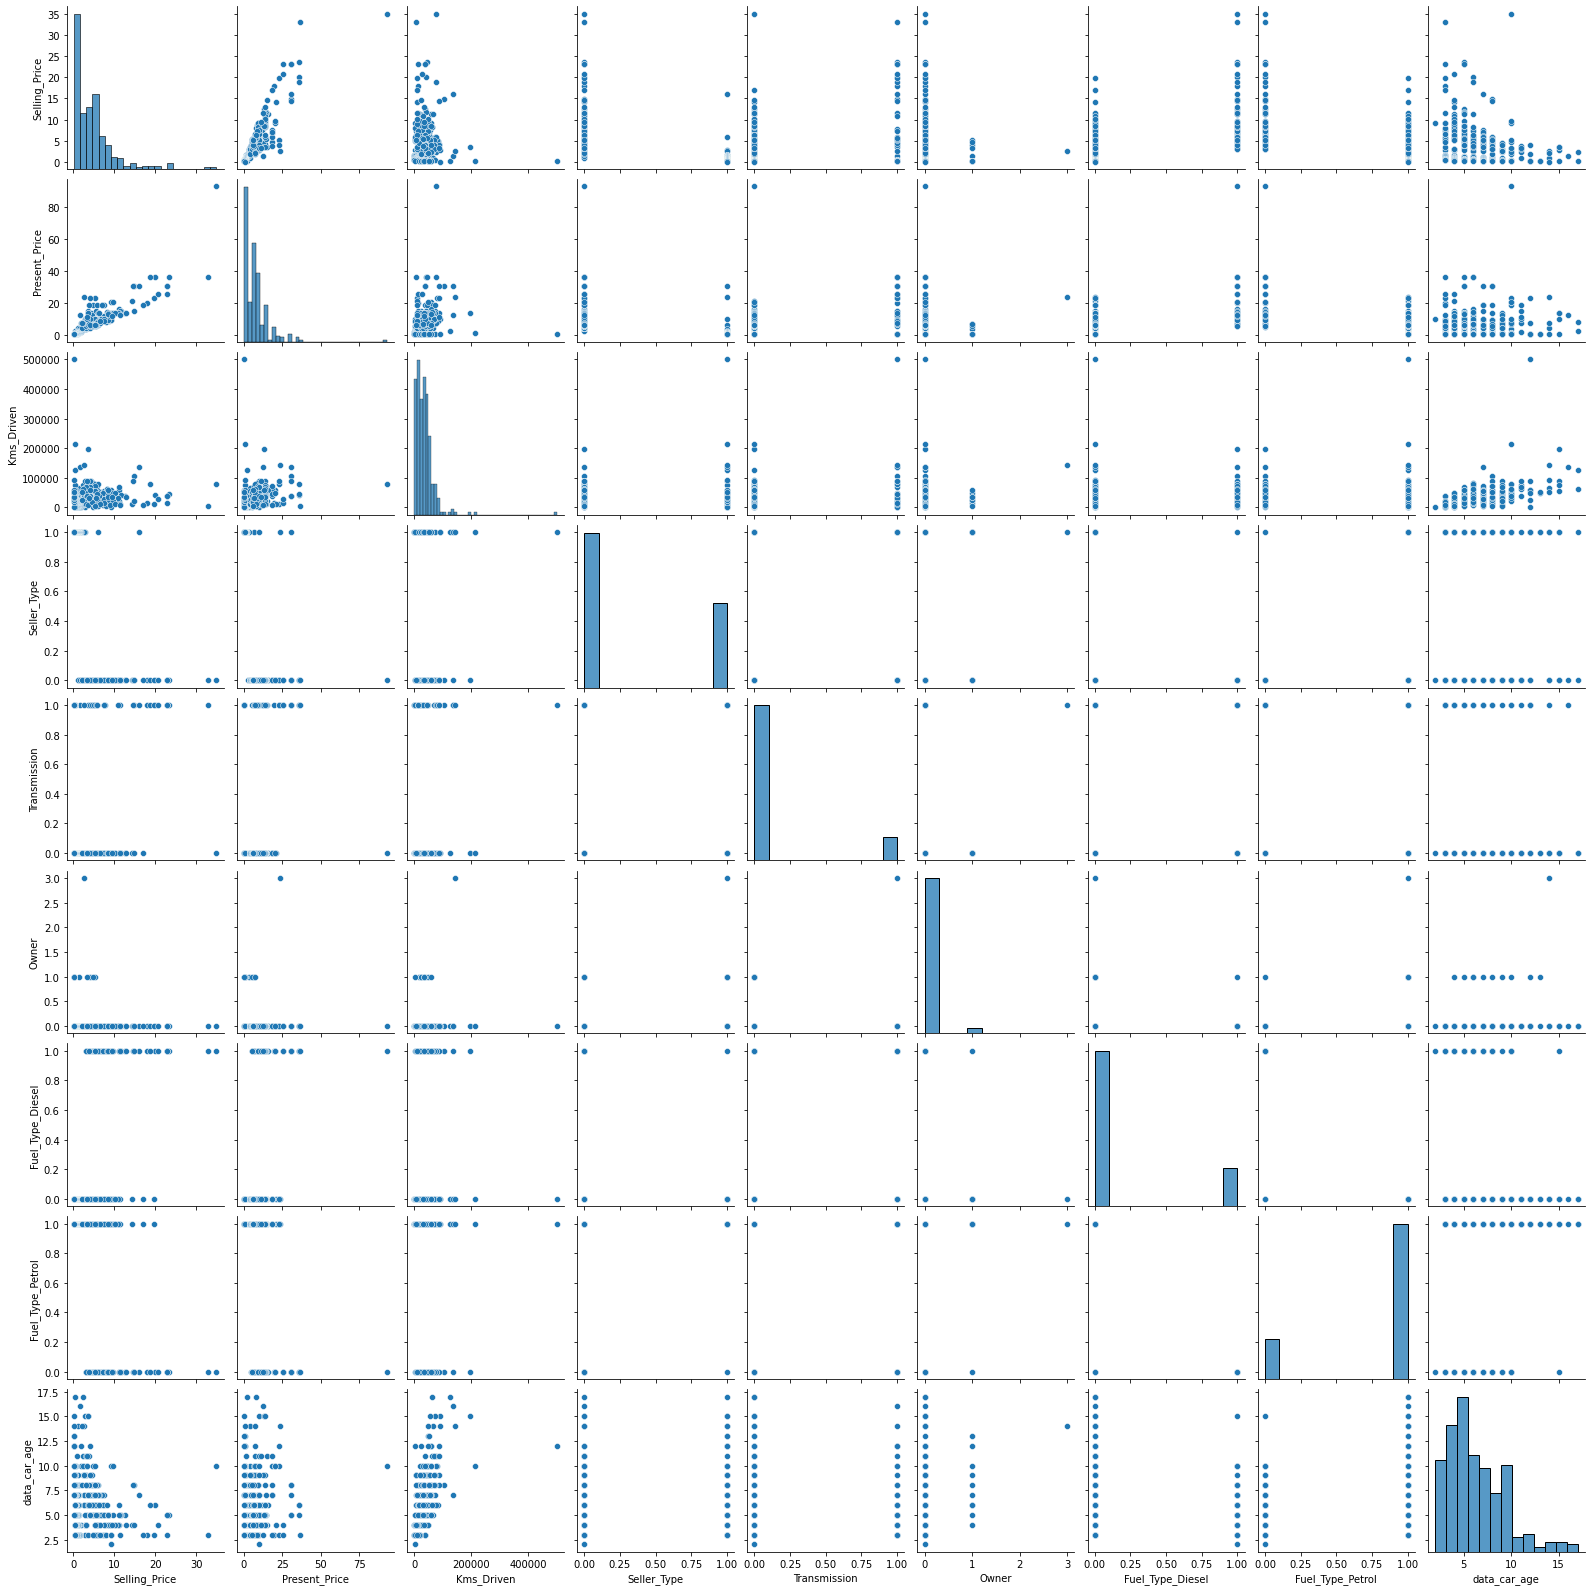

In [6]:
sns.pairplot(data_car)

In [7]:
data_car.isna().any() #Are there missing values? No missing values in the dataset¶

Car_Name            False
Selling_Price       False
Present_Price       False
Kms_Driven          False
Seller_Type         False
Transmission        False
Owner               False
Fuel_Type_Diesel    False
Fuel_Type_Petrol    False
data_car_age        False
dtype: bool

In [8]:
shuffle_data = data_car.sample(frac=1)
Y = shuffle_data['Selling_Price'] # dependent variable / Class
X = shuffle_data.drop('Selling_Price', axis='columns',inplace=False) # attributes to determine dependent variable / Class
X.drop('Car_Name', axis='columns',inplace=True)


In [9]:
# splitting the dataset into training set and test set
X=preprocessing.scale(X)
#Y=preprocessing.scale(Y) #normalizing

Feature Selection

In [10]:
selector = SelectKBest(mutual_info_regression, k=5)
selector.fit(X, Y)
# Get the kept columns according to thier support
cols = selector.get_support(indices=True)
X = X[:,cols]
print("Selected Features",cols,"\n Data",X)
print("new X data",X.shape)
#len = X.shape[1]
#for k in [2,3,4,5]:
 # print(k)
  #X_new = SelectKBest(chi2, k=k).fit_transform(X, Y)

Selected Features [0 1 2 5 7] 
 Data [[ 0.39068691  1.31334003 -0.73728539 -0.49896158  1.60315648]
 [ 0.70819342  1.31504009 -0.73728539 -0.49896158  0.91033509]
 [-0.426255   -0.30774133 -0.73728539 -0.49896158 -0.8217184 ]
 ...
 [-0.82371753 11.92751541  1.35632689 -0.49896158  1.94956718]
 [-0.37063343  0.03968844 -0.73728539 -0.49896158 -1.16812909]
 [ 0.08940337 -0.84866847 -0.73728539 -0.49896158 -0.8217184 ]]
new X data (301, 5)


In [11]:
X = np.append(np.ones((len(X),1)),X, axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

Cost Functions Options

1- Sum Squared Error: $SSE = \frac{1}{2} \sum^m_{i=1} (h_\theta(x^{(i)})-y^{(i)})^2$

2- General Mean Squared Error: $MSE = \frac{1}{m} \sum^m_{i=1} (h_\theta(x^{(i)})-y^{(i)})^2$

3- Mean Squared Error: $MSE = \frac{1}{2m} \sum^m_{i=1} (h_\theta(x^{(i)})-y^{(i)})^2$

In [12]:
def compute_cost(W,X,y,cfn = 3):
    m=X.shape[0] #number of samples
    y_pred = np.dot(X,W) 
    if cfn ==1:
      cost=(1/(2))*np.sum(((y_pred-y)**2)) #Sum SE
    elif cfn == 2:
      cost=(1/(m))*np.sum(((y_pred-y)**2)) # General MSE
    else :# cfn == 3
      cost=(1/(2*m))*np.sum(((y_pred-y)**2)) #MSE
    return cost

In [13]:
def update_parameters(W,X,y,learning_rate=0.01,cfn = 3):
    y_pred = np.dot(X,W)
    diff=(y_pred-y)
    m=X.shape[0]
    if cfn ==1:
      dW=np.dot(X.T,diff) #Total SE
    elif cfn == 2:
      dW=(2/m)*np.dot(X.T,diff) # General MSE
    else: # fn == 3
      dW=(1/m)*np.dot(X.T,diff) #MSE
    W_new = W-(learning_rate)*dW
    return W_new

In [14]:
def gradient_descent(W,X,y,threshold=0.0001,num_iters=1000,learning_rate=0.01, cfn = 3):
    #assert(X.shape[0]==y.shape[0])
    J_history=[]
    i=0
    change=1
    cost=float('inf')
    while i<num_iters and change>threshold:
        cost_prev=cost
        cost=compute_cost(W,X,y,cfn)
        change=cost_prev-cost
        W=update_parameters(W,X,y,learning_rate=learning_rate, cfn=cfn)
        J_history.append(cost)
        i+=1
    return J_history, W

In [15]:
def plot_descent(J_history):
    x=range(100)
    fig=px.scatter(x=range(len(J_history)),y=J_history)
    fig.update_layout(title='Cost vs Iterations',
                      xaxis_title='Number of iterations-->',
                      yaxis_title='Cost -->', autosize=True)
    fig.show() 

In [16]:
def plot_error(Error,Errortype,x):
    fig=px.scatter(x=x,y=Error,log_x=True)
    fig.update_layout(title='Model Error '+Errortype,
                      xaxis_title='Learninig Rate-->',
                      yaxis_title='Error -->', paper_bgcolor="LightSteelBlue",autosize=True )
    fig.show() 

Define Number of Iterations

Define Learning Rate

Define Cost Function Option

In [17]:
iters=1500
learningList= 10.**np.arange(-4, 3)
cfn = 1
learning_rate = 1
mae = []
mse = []
rmse = []
r2 = []
Results = pd.DataFrame(columns= ['cost fn','Learning rate','R2','Cost'])
pd.options.display.float_format = "{:,.4f}".format


In [18]:

W=np.zeros(X_train.shape[1]) #initialize random weights 
print("Cost Function", cfn,"Learning Rate = ",learning_rate,f'Initial Cost: {compute_cost(W,X_train,Y_train,cfn=cfn)}')
for learning_rate in learningList:
  print("Learning Rate = ",learning_rate)
  J_history, weights = gradient_descent(W,X_train,Y_train,num_iters=iters,learning_rate=learning_rate,cfn=cfn) #perform gradient descent
  print(f'Final cost: {J_history[-1]}') #print final cost
  print(f'Final weights: {weights}') #print final weights
  y_pred = np.dot(X_test,weights)
  e1 = metrics.mean_absolute_error(Y_test, y_pred)
  e2 = metrics.mean_squared_error(Y_test, y_pred)
  e3 = np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
  e4 = metrics.r2_score(Y_test,y_pred)
  Results = Results.append({'cost fn':'SSE','Learning rate':learning_rate,'R2':e4,'Cost':J_history[-1]},ignore_index=True)
  print('Mean Absolute Error:', e1)  
  print('Mean Squared Error:', e2)  
  print('Root Mean Squared Error:', e3) 
  print("R-sqaured: ", e4)
  mae.append(e1)
  mse.append(e2)
  rmse.append(e3)
  r2.append(e4)
  plot_descent(J_history)

Cost Function 1 Learning Rate =  1 Initial Cost: 5401.283
Learning Rate =  0.0001
Final cost: 411.11010251021327
Final weights: [ 4.62141675  3.88157324 -0.14579277 -0.55045135  0.60553212 -1.26419929]
Mean Absolute Error: 1.1954284315450068
Mean Squared Error: 2.6711152080860994
Root Mean Squared Error: 1.6343546763435712
R-sqaured:  0.9129000781558974


Learning Rate =  0.001
Final cost: 411.1061410522424
Final weights: [ 4.62147929  3.88624942 -0.14477272 -0.54725677  0.60321596 -1.26610078]
Mean Absolute Error: 1.1955421831303585
Mean Squared Error: 2.6697919539027435
Root Mean Squared Error: 1.633949801524742
R-sqaured:  0.9129432269259696


Learning Rate =  0.01
Final cost: 25892.851849157014
Final weights: [ -3.62968024 -16.18091971  -4.77851645  18.71972848 -16.11381495
  -0.30079606]
Mean Absolute Error: 42.4810789371738
Mean Squared Error: 2632.7208593705323
Root Mean Squared Error: 51.3100463785654
R-sqaured:  -84.84795608753119


Learning Rate =  0.1
Final cost: 4737919.880629829
Final weights: [-2323.09602357 -3445.01390424  -501.85517879  3020.6785203
 -2580.54804732   439.99692167]
Mean Absolute Error: 7076.07440645194
Mean Squared Error: 71857045.9437418
Root Mean Squared Error: 8476.853540302664
R-sqaured:  -2343118.857466764


Learning Rate =  1.0
Final cost: 500090878.173124
Final weights: [-251910.88235661 -362770.60975597  -50425.55321343  313554.90875621
 -267746.47025065   48700.45744826]
Mean Absolute Error: 740076.1203627033
Mean Squared Error: 787357478950.8962
Root Mean Squared Error: 887331.6623173639
R-sqaured:  -25674210782.716316


Learning Rate =  10.0
Final cost: 50276889261.56682
Final weights: [-25387101.03566098 -36459753.16891532  -5044955.67468919
  31470361.44288017 -26871563.68025268   4917053.3976422 ]
Mean Absolute Error: 74336487.84803554
Mean Squared Error: 7945211626110538.0
Root Mean Squared Error: 89135916.58871602
R-sqaured:  -259078047092147.25


Learning Rate =  100.0
Final cost: 5030371753142.379
Final weights: [-2.54067023e+09 -3.64780224e+09 -5.04519571e+08  3.14818485e+09
 -2.68812553e+09  4.92175416e+08]
Mean Absolute Error: 7436941731.935801
Mean Squared Error: 7.95240438293146e+19
Root Mean Squared Error: 8917625459.1295
R-sqaured:  -2.5931258903741865e+18


In [19]:
#plot_error(mse,"MSE",learningList)
#plot_error(mae,"Mean Absolute Error",learningList)
#plot_error(rmse,"Root Mean Squared Error",learningList)
#plot_error(r2,"R-sqaured",learningList)

In [20]:
cfn = 2
mae = []
mse = []
rmse = []
r2 = []
W=np.zeros(X_train.shape[1]) #initialize random weights 
print("Cost Function", cfn,"Learning Rate = ",learning_rate,f'Initial Cost: {compute_cost(W,X_train,Y_train,cfn=cfn)}')
for learning_rate in learningList:
  print("Learning Rate = ",learning_rate)
  J_history, weights = gradient_descent(W,X_train,Y_train,num_iters=iters,learning_rate=learning_rate,cfn=cfn) #perform gradient descent
  print(f'Final cost: {J_history[-1]}') #print final cost
  print(f'Final weights: {weights}') #print final weights
  y_pred = np.dot(X_test,weights)
  e1 = metrics.mean_absolute_error(Y_test, y_pred)
  e2 = metrics.mean_squared_error(Y_test, y_pred)
  e3 = np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
  e4 = metrics.r2_score(Y_test,y_pred)
  Results = Results.append({'cost fn':'General MSE','Learning rate':learning_rate,'R2':e4,'Cost':J_history[-1]},ignore_index=True)
  print('Mean Absolute Error:', e1)  
  print('Mean Squared Error:', e2)  
  print('Root Mean Squared Error:', e3) 
  print("R-sqaured: ", e4)
  mae.append(e1)
  mse.append(e2)
  rmse.append(e3)
  r2.append(e4)
  plot_descent(J_history)

Cost Function 2 Learning Rate =  100.0 Initial Cost: 45.010691666666666
Learning Rate =  0.0001
Final cost: 23.837107688986414
Final weights: [ 1.18046707  1.02721958 -0.01162394 -0.59171284  0.49809429 -0.28899959]
Mean Absolute Error: 3.8511759501270157
Mean Squared Error: 29.429753322870262
Root Mean Squared Error: 5.424919660499154
R-sqaured:  0.0403524316160474


Learning Rate =  0.001
Final cost: 3.682299673990112
Final weights: [ 4.38262107  3.39056747 -0.18062557 -0.86855447  0.8026357  -1.11646845]
Mean Absolute Error: 1.210250026642114
Mean Squared Error: 3.1405250750735587
Root Mean Squared Error: 1.7721526669769618
R-sqaured:  0.8975935265688718


Learning Rate =  0.01
Final cost: 3.4309594883924652
Final weights: [ 4.61586101  3.81250602 -0.15587462 -0.59844335  0.63693969 -1.24120339]
Mean Absolute Error: 1.1942738583999082
Mean Squared Error: 2.6988007228685897
Root Mean Squared Error: 1.6428027035735575
R-sqaured:  0.9119973068465698


Learning Rate =  0.1
Final cost: 3.4262912768898284
Final weights: [ 4.62115639  3.86849112 -0.14830158 -0.55945209  0.61182601 -1.2592422 ]
Mean Absolute Error: 1.1951826076521321
Mean Squared Error: 2.675219660313305
Root Mean Squared Error: 1.6356098741183074
R-sqaured:  0.9127662398747478


Learning Rate =  1.0
Final cost: 129.0879070654132
Final weights: [ 0.50427761 -8.41742583 -3.28137171 11.2271175  -9.69452188 -0.9343129 ]
Mean Absolute Error: 25.926263746015465
Mean Squared Error: 992.9581673161978
Root Mean Squared Error: 31.511238746139412
R-sqaured:  -31.37845320407329


Learning Rate =  10.0
Final cost: 27087.18856983386
Final weights: [-1583.01223859 -2364.17752712  -348.14011593  2079.96647749
 -1777.09098113   298.29915041]
Mean Absolute Error: 4864.5528537830805
Mean Squared Error: 33949237.14560088
Root Mean Squared Error: 5826.597390038279
R-sqaured:  -1107018.230431273


Learning Rate =  100.0
Final cost: 2890607.361891312
Final weights: [-174635.62385876 -251642.10215566  -35014.04103811  217569.19502012
 -185785.48604569   33747.21944275]
Mean Absolute Error: 513434.94413197035
Mean Squared Error: 378941314990.0858
Root Mean Squared Error: 615582.0944358972
R-sqaured:  -12356546365.559444


In [21]:
#plot_error(mse,"MSE",learningList)
#plot_error(mae,"Mean Absolute Error",learningList)
#plot_error(rmse,"Root Mean Squared Error",learningList)
#plot_error(r2,"R-sqaured",learningList)

In [22]:
cfn = 3
mae = []
mse = []
rmse = []
r2 = []
W=np.zeros(X_train.shape[1]) #initialize random weights 
print("Cost Function", cfn,"Learning Rate = ",learning_rate,f'Initial Cost: {compute_cost(W,X_train,Y_train,cfn=cfn)}')
for learning_rate in learningList:
  print("Learning Rate = ",learning_rate)
  J_history, weights = gradient_descent(W,X_train,Y_train,num_iters=iters,learning_rate=learning_rate,cfn=cfn) #perform gradient descent
  print(f'Final cost: {J_history[-1]}') #print final cost
  print(f'Final weights: {weights}') #print final weights
  y_pred = np.dot(X_test,weights)
  e1 = metrics.mean_absolute_error(Y_test, y_pred)
  e2 = metrics.mean_squared_error(Y_test, y_pred)
  e3 = np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
  e4 = metrics.r2_score(Y_test,y_pred)
  Results = Results.append({'cost fn':'MSE','Learning rate':learning_rate,'R2':e4,'Cost':J_history[-1]},ignore_index=True)
  print('Mean Absolute Error:', e1)  
  print('Mean Squared Error:', e2)  
  print('Root Mean Squared Error:', e3) 
  print("R-sqaured: ", e4)
  mae.append(e1)
  mse.append(e2)
  rmse.append(e3)
  r2.append(e4)
  plot_descent(J_history)

Cost Function 3 Learning Rate =  100.0 Initial Cost: 22.505345833333333
Learning Rate =  0.0001
Final cost: 16.15665301715442
Final weights: [ 6.33286385e-01  5.68922450e-01  8.24400372e-06 -3.42711536e-01
  2.88712518e-01 -1.53705431e-01]
Mean Absolute Error: 4.449849104680272
Mean Squared Error: 40.51948457400959
Root Mean Squared Error: 6.36549169931197
R-sqaured:  -0.3212623434869828


Learning Rate =  0.001
Final cost: 2.738639731905414
Final weights: [ 3.56926287  2.74864995 -0.14621992 -1.07496285  0.9239993  -0.89243629]
Mean Absolute Error: 1.5531201171879883
Mean Squared Error: 5.55980666109132
Root Mean Squared Error: 2.3579242271734095
R-sqaured:  0.8187054140594874


Learning Rate =  0.01
Final cost: 1.7230198624059345
Final weights: [ 4.59923337  3.73722295 -0.16377435 -0.6505942   0.66934886 -1.21874508]
Mean Absolute Error: 1.1946177770038207
Mean Squared Error: 2.7413722182254627
Root Mean Squared Error: 1.655708977515512
R-sqaured:  0.9106091323840286


Learning Rate =  0.1
Final cost: 1.71385947778095
Final weights: [ 4.6197774   3.84443131 -0.15188925 -0.57618821  0.6228156  -1.25117959]
Mean Absolute Error: 1.1948486742261621
Mean Squared Error: 2.684349472583996
Root Mean Squared Error: 1.6383984474431108
R-sqaured:  0.912468534282409


Learning Rate =  1.0
Final cost: 1.714770887159784
Final weights: [ 4.62203842  3.86553041 -0.16520325 -0.52848513  0.58451219 -1.28071951]
Mean Absolute Error: 1.2059627910798179
Mean Squared Error: 2.7194637672919777
Root Mean Squared Error: 1.6490796728151063
R-sqaured:  0.9113235247689978


Learning Rate =  10.0
Final cost: 3143.9656870168365
Final weights: [-350.37972631 -548.75452222  -86.47939163  493.40121028 -421.83833436
   63.69338649]
Mean Absolute Error: 1143.4279177274914
Mean Squared Error: 1872892.7259951264
Root Mean Squared Error: 1368.5367097725682
R-sqaured:  -61070.424236114675


Learning Rate =  100.0
Final cost: 358754.680309915
Final weights: [-43205.17263136 -62487.62694327  -8747.95388604  54126.39466415
 -46222.02740219   8327.99084954]
Mean Absolute Error: 127599.89811679341
Mean Squared Error: 23398875703.734432
Root Mean Squared Error: 152966.91048633502
R-sqaured:  -762992264.8766311


### **Check the Algorithm Result for the different Cost Functions and Learning Rates**

In [ ]:
display(Results

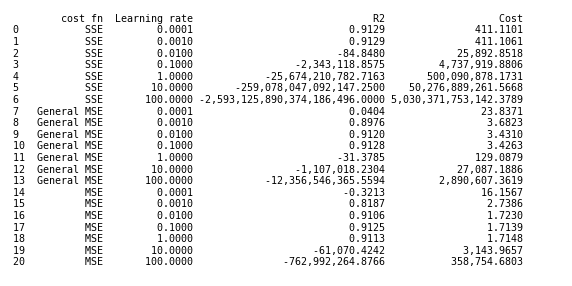

In [24]:
plt.rc('figure', figsize=(10, 5))
plt.text(0.01, 0.05, Results.to_string(), {'fontsize': 'x-large'}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
#plt.tight_layout()
plt.savefig('output.png')

In [25]:
#plot_error(mse,"MSE",learningList)
#plot_error(mae,"Mean Absolute Error",learningList)
#plot_error(rmse,"Root Mean Squared Error",learningList)
#plot_error(r2,"R-sqaured",learningList)

## Ridge Regression Code for Regularization

In [26]:
# Ridge Regression 
  
class RidgeRegression() : 
      
    def __init__( self, learning_rate, iterations, l2_penality ) : 
          
        self.learning_rate = learning_rate         
        self.iterations = iterations         
        self.l2_penality = l2_penality 
          
    # Function for model training             
    def fit( self, X, Y ) : 
          
        # no_of_training_examples, no_of_features         
        self.m, self.n = X.shape 
          
        # weight initialization         
        self.W = np.zeros( self.n ) 
          
        self.b = 0        
        self.X = X         
        self.Y = Y 
          
        # gradient descent learning 
                  
        for i in range( self.iterations ) :             
            self.update_weights()             
        return self
      
    # Helper function to update weights in gradient descent 
      
    def update_weights( self ) :            
        Y_pred = self.predict( self.X ) 
          
        # calculate gradients       
        dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) +               
               ( 2 * self.l2_penality * self.W ) ) / self.m      
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m  
          
        # update weights     
        self.W = self.W - self.learning_rate * dW     
        self.b = self.b - self.learning_rate * db         
        return self
      
    # Hypothetical function  h( x )  
    def predict( self, X ) :     
        return X.dot( self.W ) + self.b 
        
  
 

# Trying for different alpha values and regularization factor values

In [27]:
regList = [0.01,0.1,2,5]
for a in [0.001,0.01,0.1]:
  for l2_penality in regList:
    model = RidgeRegression( iterations = 1000,                              
                            learning_rate = a, l2_penality = l2_penality ) 
    model.fit( X_train, Y_train )      
    # Prediction on test set 
    y_pred = model.predict(X_test)
    # calculate R^2 value, MAE, MSE, RMSE
    e1 = metrics.mean_absolute_error(Y_test, y_pred)
    e2 = metrics.mean_squared_error(Y_test, y_pred)
    e3 = np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
    e4 = metrics.r2_score(Y_test,y_pred)
    #s1 = metrics.score(Y_test, y_pred)
    print("for alpha = ",a,"and regularization = ",l2_penality, "MAE %.4f"%e1,"MSE %.4f"%e2,"RMSE %.4f"%e3,"R2 %.4f"%e4) 

for alpha =  0.001 and regularization =  0.01 MAE 1.2554 MSE 3.4108 RMSE 1.8468 R2 0.8888
for alpha =  0.001 and regularization =  0.1 MAE 1.2555 MSE 3.4125 RMSE 1.8473 R2 0.8887
for alpha =  0.001 and regularization =  2 MAE 1.2573 MSE 3.4474 RMSE 1.8567 R2 0.8876
for alpha =  0.001 and regularization =  5 MAE 1.2600 MSE 3.5039 RMSE 1.8719 R2 0.8857
for alpha =  0.01 and regularization =  0.01 MAE 1.1956 MSE 2.6697 RMSE 1.6339 R2 0.9129
for alpha =  0.01 and regularization =  0.1 MAE 1.1956 MSE 2.6711 RMSE 1.6343 R2 0.9129
for alpha =  0.01 and regularization =  2 MAE 1.1953 MSE 2.7017 RMSE 1.6437 R2 0.9119
for alpha =  0.01 and regularization =  5 MAE 1.1968 MSE 2.7522 RMSE 1.6590 R2 0.9103
for alpha =  0.1 and regularization =  0.01 MAE 1.1956 MSE 2.6696 RMSE 1.6339 R2 0.9129
for alpha =  0.1 and regularization =  0.1 MAE 1.1956 MSE 2.6710 RMSE 1.6343 R2 0.9129
for alpha =  0.1 and regularization =  2 MAE 1.1959 MSE 2.6995 RMSE 1.6430 R2 0.9120
for alpha =  0.1 and regularization = 

## Linear Regression using Scikit Learn Library

In [28]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression() 
  
regr.fit(X_train, Y_train)
y_pred = regr.predict(X_test)
e1 = metrics.mean_absolute_error(Y_test, y_pred)
e2 = metrics.mean_squared_error(Y_test, y_pred)
e3 = np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
e4 = metrics.r2_score(Y_test,y_pred)
print("%.4f"%regr.score(X_test, Y_test), "MAE",e1,"MSE",e2,"RMSE",e3,"R2",e4) 

0.9130 MAE 1.1956042281487294 MSE 2.669476457355063 RMSE 1.6338532545351383 R2 0.9129535146606812


## **Regularization using library Ridge regression **

> Indented block

> Indented block





In [29]:
# alpha=0 is equivalent to linear regression

alpha = 10.**np.arange(-2, 3)
for a in alpha: 
  ridgereg = Ridge(alpha=a, normalize=True)
  ridgereg.fit(X_train, Y_train)
  y_pred = ridgereg.predict(X_test)
  # calculate R^2 value, MAE, MSE, RMSE
  e1 = metrics.mean_absolute_error(Y_test, y_pred)
  e2 = metrics.mean_squared_error(Y_test, y_pred)
  e3 = np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
  e4 = metrics.r2_score(Y_test,y_pred)
  s1 = ridgereg.score(X_test, Y_test)
  print("for alpha = ",a,"\n Score %.4f"%s1, "MAE %.4f"%e1,"MSE %.4f"%e2,"RMSE %.4f"%e3,"R2 %.4f"%e4) 

for alpha =  0.01 
 Score 0.9118 MAE 1.1966 MSE 2.7034 RMSE 1.6442 R2 0.9118
for alpha =  0.1 
 Score 0.8991 MAE 1.2454 MSE 3.0932 RMSE 1.7587 R2 0.8991
for alpha =  1.0 
 Score 0.7309 MAE 1.7806 MSE 8.2532 RMSE 2.8728 R2 0.7309
for alpha =  10.0 
 Score 0.2130 MAE 3.3351 MSE 24.1363 RMSE 4.9129 R2 0.2130
for alpha =  100.0 
 Score 0.0155 MAE 3.7929 MSE 30.1912 RMSE 5.4947 R2 0.0155
